Data Preprocessing

In [123]:
import pandas as pd
weather = pd.read_csv('../../data/auckland_rain_temp_statsNZcombineNoaaData.csv', parse_dates=['Date'])
weather.head()

,Date,Rainfall(mm),Tavg,Tmax,Tmin
0,1966-01-01,0.0,18.0,22.2,13.9
1,1966-01-02,26.2,20.5,23.9,17.1
2,1966-01-03,0.0,20.3,23.5,17.1
3,1966-01-04,0.0,20.3,24.4,16.2
4,1966-01-05,1.3,20.6,23.4,17.8


In [124]:
print(weather.isnull().sum())


Date             0
Rainfall(mm)     0
Tavg             0
Tmax            37
Tmin            82
dtype: int64


In [125]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21096 entries, 0 to 21095
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21096 non-null  datetime64[ns]
 1   Rainfall(mm)  21096 non-null  float64       
 2   Tavg          21096 non-null  float64       
 3   Tmax          21059 non-null  float64       
 4   Tmin          21014 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 824.2 KB


In [126]:
weather[['Tmax', 'Tmin']] = weather[['Tmax', 'Tmin']].interpolate(method='linear')
weather.isna().sum()

Date            0
Rainfall(mm)    0
Tavg            0
Tmax            0
Tmin            0
dtype: int64

In [127]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21096 entries, 0 to 21095
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21096 non-null  datetime64[ns]
 1   Rainfall(mm)  21096 non-null  float64       
 2   Tavg          21096 non-null  float64       
 3   Tmax          21096 non-null  float64       
 4   Tmin          21096 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 824.2 KB


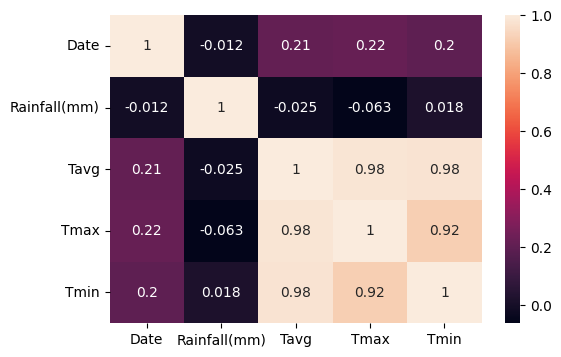

In [128]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Heatmap for correlation between variables

# Select only the numeric columns from the 'weather' DataFrame
numeric_columns = weather.select_dtypes(include=[np.number])

plt.figure(figsize=(6, 4))
sns.heatmap(weather.corr(), annot=True)
plt.show()

<Axes: >

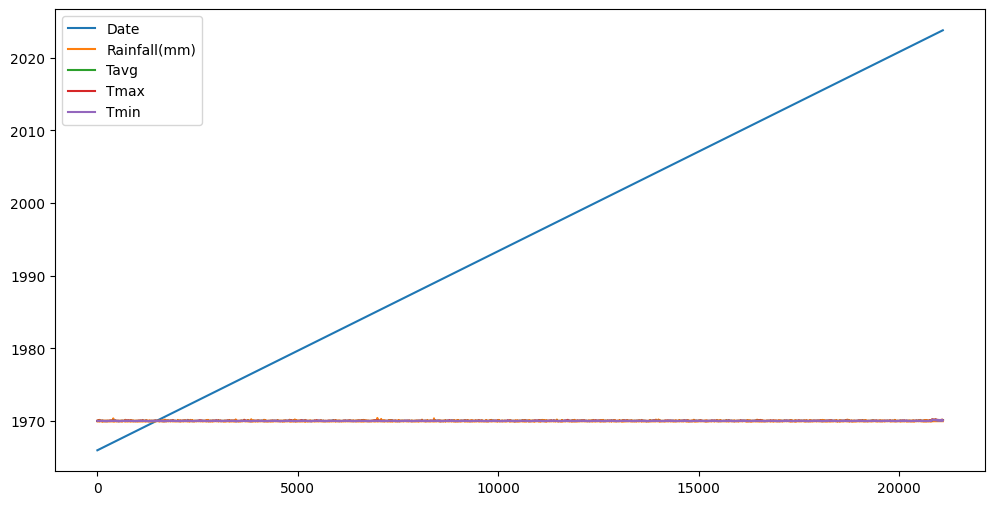

In [129]:
weather.plot(figsize=(12, 6))

In [130]:
weather.describe()

,Date,Rainfall(mm),Tavg,Tmax,Tmin
count,21096,21096.000000,21096.000000,21096.000000,21096.000000
mean,1994-11-17 12:00:00,2.980838,16.045985,19.637955,12.448071
min,1966-01-01 00:00:00,0.000000,5.000000,8.100000,-0.300000
25%,1980-06-09 18:00:00,0.000000,12.600000,15.900000,9.200000
50%,1994-11-17 12:00:00,0.010000,15.400000,18.800000,12.200000
75%,2009-04-26 06:00:00,2.500000,18.600000,22.200000,15.100000
max,2023-10-04 00:00:00,161.800000,72.000000,81.000000,69.000000
std,NaN,7.263680,6.318636,6.716051,6.158920


In [131]:
weather.head()

,Date,Rainfall(mm),Tavg,Tmax,Tmin
0,1966-01-01,0.0,18.0,22.2,13.9
1,1966-01-02,26.2,20.5,23.9,17.1
2,1966-01-03,0.0,20.3,23.5,17.1
3,1966-01-04,0.0,20.3,24.4,16.2
4,1966-01-05,1.3,20.6,23.4,17.8


Lag Features

In [132]:
lag_size = 7

# Create lag features for 'Rainfall (mm)'
for i in range(1, lag_size + 1):
    weather[f'Rainfall_lag_{i}'] = weather['Rainfall(mm)'].shift(i)

# Create lag features for 'Temperature'
for i in range(1, lag_size + 1):
    weather[f'Tavg_lag_{i}'] = weather['Tavg'].shift(i)

for i in range(1, lag_size + 1):
    weather[f'Tmax_lag_{i}'] = weather['Tmax'].shift(i)
for i in range(1, lag_size + 1):
    weather[f'Tmin_lag_{i}'] = weather['Tmin'].shift(i)

weather.dropna(inplace=True)  # Drop rows with NaN values in the lag features

Split Data

In [133]:
print(weather.columns)


Index(['Date', 'Rainfall(mm)', 'Tavg', 'Tmax', 'Tmin', 'Rainfall_lag_1',
       'Rainfall_lag_2', 'Rainfall_lag_3', 'Rainfall_lag_4', 'Rainfall_lag_5',
       'Rainfall_lag_6', 'Rainfall_lag_7', 'Tavg_lag_1', 'Tavg_lag_2',
       'Tavg_lag_3', 'Tavg_lag_4', 'Tavg_lag_5', 'Tavg_lag_6', 'Tavg_lag_7',
       'Tmax_lag_1', 'Tmax_lag_2', 'Tmax_lag_3', 'Tmax_lag_4', 'Tmax_lag_5',
       'Tmax_lag_6', 'Tmax_lag_7', 'Tmin_lag_1', 'Tmin_lag_2', 'Tmin_lag_3',
       'Tmin_lag_4', 'Tmin_lag_5', 'Tmin_lag_6', 'Tmin_lag_7'],
      dtype='object')


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
weather_imputed = weather.drop('Date', axis=1).copy()
weather_imputed.iloc[:, 1:] = imputer.fit_transform(weather_imputed.iloc[:, 1:])

# Define features and target
X = weather_imputed.drop(['Rainfall_lag_1'], axis=1)
y = weather_imputed['Rainfall_lag_1']

# Min-Max scaling for features
scaler = MinMaxScaler()
X = X.astype(float)
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False, random_state=42)

# Reshape the data for LSTM (assuming lag_size=3)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


# LSTM Model

In [135]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Make predictions
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_predictions = lstm_predictions.flatten()

Epoch 1/50
475/475 [==============================] - 4s 4ms/step - loss: 57.0814 - val_loss: 45.6905
Epoch 2/50
475/475 [==============================] - 1s 3ms/step - loss: 55.4079 - val_loss: 44.8385
Epoch 3/50
475/475 [==============================] - 1s 3ms/step - loss: 54.4726 - val_loss: 43.7220
Epoch 4/50
475/475 [==============================] - 1s 3ms/step - loss: 53.2637 - val_loss: 42.3725
Epoch 5/50
475/475 [==============================] - 1s 3ms/step - loss: 52.1801 - val_loss: 41.6104
Epoch 6/50
475/475 [==============================] - 1s 3ms/step - loss: 51.5698 - val_loss: 41.1660
Epoch 7/50
475/475 [==============================] - 1s 3ms/step - loss: 51.2430 - val_loss: 40.8301
Epoch 8/50
475/475 [==============================] - 1s 3ms/step - loss: 51.0743 - val_loss: 40.9621
Epoch 9/50
475/475 [==============================] - 1s 3ms/step - loss: 50.9455 - val_loss: 40.6867
Epoch 10/50
475/475 [==============================] - 1s 3ms/step - loss: 50.8711

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Make predictions on the training set
train_lstm_predictions = lstm_model.predict(X_train_lstm)

# Make predictions on the testing set
test_lstm_predictions = lstm_model.predict(X_test_lstm)

# Calculate RMSE for training set
rmse_train = sqrt(mean_squared_error(y_train, train_lstm_predictions))

# Calculate MAE for training set
mae_train = mean_absolute_error(y_train, train_lstm_predictions)

# Calculate MSE for training set
mse_train = mean_squared_error(y_train, train_lstm_predictions)

# Calculate R2 score for training set
r2_train = r2_score(y_train, train_lstm_predictions)

# Calculate RMSE for testing set
rmse_test = sqrt(mean_squared_error(y_test, test_lstm_predictions))

# Calculate MAE for testing set
mae_test = mean_absolute_error(y_test, test_lstm_predictions)

# Calculate MSE for testing set
mse_test = mean_squared_error(y_test, test_lstm_predictions)

# Calculate R2 score for testing set
r2_test = r2_score(y_test, test_lstm_predictions)

# Print the metrics for training set
print("Training Set Metrics:")
print("LSTM Root Mean Squared Error (RMSE):", rmse_train)
print("LSTM Mean Absolute Error (MAE):", mae_train)
print("LSTM Mean Squared Error (MSE):", mse_train)
print("LSTM R2 Score:", r2_train)

# Print the metrics for testing set
print("\nTesting Set Metrics:")
print("LSTM Root Mean Squared Error (RMSE):", rmse_test)
print("LSTM Mean Absolute Error (MAE):", mae_test)
print("LSTM Mean Squared Error (MSE):", mse_test)
print("LSTM R2 Score:", r2_test)


  1/528 [..............................] - ETA: 20s

132/132 [==============================] - 0s 3ms/step
Training Set Metrics:
LSTM Root Mean Squared Error (RMSE): 6.981133807658601
LSTM Mean Absolute Error (MAE): 3.8419461460225537
LSTM Mean Squared Error (MSE): 48.73622924043388
LSTM R2 Score: 0.10763455155180335

Testing Set Metrics:
LSTM Root Mean Squared Error (RMSE): 6.241846369370754
LSTM Mean Absolute Error (MAE): 3.5747149049790976
LSTM Mean Squared Error (MSE): 38.96064609882687
LSTM R2 Score: 0.13871716337508788


In [137]:
import matplotlib.pyplot as plt

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_lstm_predictions}, index=X_test.index)

# Resample data to a weekly frequency
result_df_weekly = result_df.resample('W').mean()

# Plotting actual vs. predicted values using subplots
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(result_df_weekly.index, result_df_weekly['Actual'], label='Actual', marker='.')
ax.plot(result_df_weekly.index, result_df_weekly['Predicted'], label='Predicted', marker='.')

ax.set_title('Actual vs. Predicted Rainfall')
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall (mm)')
ax.legend()

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'